In [1]:
import pandas as pd
import numpy as np

#Reports
from ydata_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv
import phik
import shap

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Class
import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


<b>Data Frame</b>

In [2]:
df = pd.read_csv("Prepared_Almond.csv")
df.head()


,Length,Width,Area,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Type,cluster,cluster_average_Type
0,272.553253,227.940628,22619.0,0.460467,0.973384,1.458265,1.565795,0.798147,0.681193,0,0,1.167852
1,340.942719,234.188126,23038.0,0.451983,0.957304,1.601844,1.552992,0.755233,0.656353,0,1,0.881928
2,344.597992,229.418610,22386.5,0.178304,0.967270,1.487772,1.696236,0.845151,0.683620,0,1,0.881928
3,367.850677,232.763153,22578.5,0.547965,0.965512,1.540979,1.942538,0.806122,0.685360,0,2,0.691030
4,276.140106,230.150742,19068.0,0.430272,0.951450,1.629395,2.142503,0.844623,0.714800,0,3,0.883721


<b>Y Data</b>

In [3]:
report = ProfileReport(df, title='Almond Data')
report.to_file("ydata_Almond.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b>AutoViz</b>

In [4]:
AV = AutoViz_Class()
reg_av=report = AV.AutoViz("Prepared_Almond.csv")

Shape of your Data Set loaded: (2779, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 1 du

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Length,float64,0.000000,NA,151.335266,515.352478,Column has 20 outliers greater than upper bound (455.49) or lower than lower bound(118.53). Cap them or remove them.
Width,float64,0.000000,NA,88.050529,258.569794,Column has 12 outliers greater than upper bound (251.99) or lower than lower bound(88.17). Cap them or remove them.
Area,float64,0.000000,NA,6037.000000,89282.000000,Column has 86 outliers greater than upper bound (59097.50) or lower than lower bound(-9508.50). Cap them or remove them.
Roundness,float64,0.000000,NA,0.173748,0.685577,No issue
Solidity,float64,0.000000,NA,0.718772,0.992889,Column has 199 outliers greater than upper bound (1.04) or lower than lower bound(0.89). Cap them or remove them.
Compactness,float64,0.000000,NA,1.164469,6.825684,"Column has 200 outliers greater than upper bound (2.86) or lower than lower bound(0.45). Cap them or remove them., Column has a high correlation with ['Solidity']. Consider dropping one of them."
Aspect_Ratio,float64,0.000000,NA,1.400082,2.607368,Column has 128 outliers greater than upper bound (2.17) or lower than lower bound(1.28). Cap them or remove them.
Eccentricity,float64,0.000000,NA,0.713582,0.930563,Column has 9 outliers greater than upper bound (0.92) or lower than lower bound(0.70). Cap them or remove them.
Extent,float64,0.000000,NA,0.466543,0.819316,Column has 106 outliers greater than upper bound (0.84) or lower than lower bound(0.62). Cap them or remove them.
Type,int64,0.000000,0,0.000000,2.000000,No issue


Number of All Scatter Plots = 55
All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [5]:
report = AV.AutoViz("Prepared_Almond.csv", chart_format="bokeh", depVar="Type")

Shape of your Data Set loaded: (2779, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################


BokehModel(combine_events=True, render_bundle={'docs_json': {'dd5fe4a8-8a75-427b-b30e-0b55a36e4952': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'09b57950-71bd-4899-ac1f-a81b7ae17fa1': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'aaa926f3-9afd-4c3e-940a-6ed4ddefad3d': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'a305965a-3eb1-4ccb-a259-4be5e01eac00': {'version…

KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


BokehModel(combine_events=True, render_bundle={'docs_json': {'5aa0f4b4-9d9f-439c-b685-5a1398c99714': {'version…

No date vars could be found in data set


BokehModel(combine_events=True, render_bundle={'docs_json': {'f91c3a97-ec9f-4ea0-a456-3a6f2aef3279': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'d78bd782-c12f-44cd-8c98-38507a48182a': {'version…

Time to run AutoViz (in seconds) = 6


<b>SweetViz</b>

In [6]:
report=sv.analyze(df)
report.show_html('sv_Almond.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sv_Almond.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<b>Phik-Matrix</b>

In [7]:
# compute phik-matrix values
phik_matrix = df.phik_matrix()

phik_matrix

interval columns not set, guessing: ['Length', 'Width', 'Area', 'Roundness', 'Solidity', 'Compactness', 'Aspect_Ratio', 'Eccentricity', 'Extent', 'Type', 'cluster', 'cluster_average_Type']


,Length,Width,Area,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,Type,cluster,cluster_average_Type
Length,1.000000,0.464679,0.741082,0.447508,0.115817,0.281588,0.336646,0.323438,0.201864,0.381424,0.557103,0.651513
Width,0.464679,1.000000,0.695018,0.188033,0.245167,0.181370,0.242949,0.275521,0.225086,0.289517,0.413574,0.516557
Area,0.741082,0.695018,1.000000,0.387076,0.161120,0.152216,0.261538,0.279732,0.371701,0.288466,0.675042,0.827333
Roundness,0.447508,0.188033,0.387076,1.000000,0.350555,0.407002,0.578211,0.629569,0.445701,0.462459,0.638319,0.750437
Solidity,0.115817,0.245167,0.161120,0.350555,1.000000,0.856449,0.154479,0.084522,0.779734,0.365655,0.647753,0.797432
Compactness,0.281588,0.181370,0.152216,0.407002,0.856449,1.000000,0.133363,0.094561,0.664733,0.308523,0.617655,0.755701
Aspect_Ratio,0.336646,0.242949,0.261538,0.578211,0.154479,0.133363,1.000000,0.689048,0.198475,0.304515,0.530524,0.552191
Eccentricity,0.323438,0.275521,0.279732,0.629569,0.084522,0.094561,0.689048,1.000000,0.187476,0.278604,0.414257,0.485262
Extent,0.201864,0.225086,0.371701,0.445701,0.779734,0.664733,0.198475,0.187476,1.000000,0.393010,0.621431,0.774525
Type,0.381424,0.289517,0.288466,0.462459,0.365655,0.308523,0.304515,0.278604,0.393010,1.000000,0.525306,0.311980


<b>Data Prep</b>
<p> is done in Python 3.9 you can see the report in the html folder</p>

<h3>X/Y Tets</h3>

<b>X</b>

In [8]:
# everything else except the target variable
X = df.drop(["Type"], axis=1)

<b>Y Classification</b>

In [9]:
# have only the target variable here (dependent variable)
y_temp = df['Type']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

<b>Shap</b>

In [10]:
%matplotlib inline

In [11]:
# Could not use shap, 
# Error: ValueError: Per-column arrays must each be 1-dimensional
# AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.
data=df
le = LabelEncoder()
data['Type_encoded'] = le.fit_transform(data['Type'])
data=data.drop(['Type'],axis=1)

X = data.drop(columns='Type_encoded')
y = data['Type_encoded']
data


,Length,Width,Area,Roundness,Solidity,Compactness,Aspect_Ratio,Eccentricity,Extent,cluster,cluster_average_Type,Type_encoded
0,272.553253,227.940628,22619.0,0.460467,0.973384,1.458265,1.565795,0.798147,0.681193,0,1.167852,0
1,340.942719,234.188126,23038.0,0.451983,0.957304,1.601844,1.552992,0.755233,0.656353,1,0.881928,0
2,344.597992,229.418610,22386.5,0.178304,0.967270,1.487772,1.696236,0.845151,0.683620,1,0.881928,0
3,367.850677,232.763153,22578.5,0.547965,0.965512,1.540979,1.942538,0.806122,0.685360,2,0.691030,0
4,276.140106,230.150742,19068.0,0.430272,0.951450,1.629395,2.142503,0.844623,0.714800,3,0.883721,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2774,244.866592,192.709366,18471.5,0.456914,0.931000,1.838965,1.812843,0.762105,0.725739,0,1.167852,2
2775,366.171509,186.254745,17213.5,0.642495,0.952706,1.564234,1.705885,0.810162,0.714016,5,1.250960,2
2776,408.806732,186.196182,17510.5,0.558189,0.948821,1.681705,1.668084,0.822138,0.718999,1,0.881928,2
2777,280.646667,188.660828,17941.0,0.386465,0.944810,1.764701,1.705924,0.797262,0.738191,0,1.167852,2


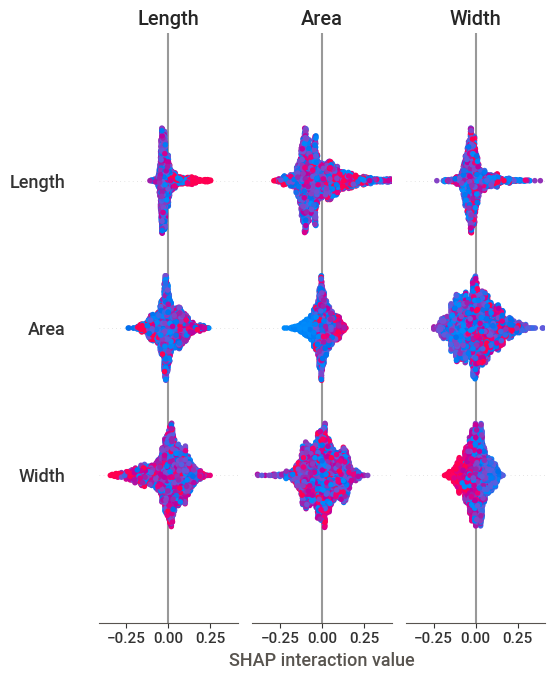

ValueError: Per-column arrays must each be 1-dimensional

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=0)

# Train a classification model
model = RandomForestClassifier()
model.fit(X_train, y_train)



explainer = shap.TreeExplainer(model)
# SHAP values for multi-class classification return a list of shap_values, one for each class
shap_values = explainer.shap_values(X)




# Plot SHAP summary
shap.summary_plot(shap_values, X, feature_names=X.columns)


importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
print("Feature Importances using SHAP:")
print(importance)

<b>Fisher</b>

<Axes: >

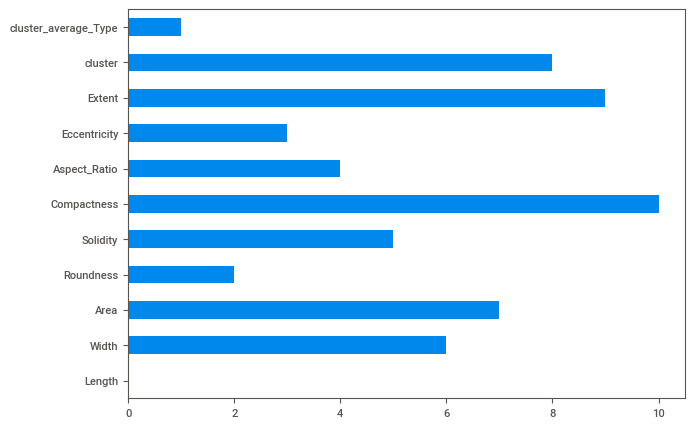

In [13]:
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

<b>Lime</b>